In [1]:
import time
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time.time()*10**12
        result = func(*args, **kwargs)
        t2 = time.time()*10**12
        return result , t2-t1
    return wrap_func

# Boyer-Moore String Search Algorithm

La cadena-algoritmo de búsqueda de Boyer-Moore es un eficiente algoritmo de búsqueda de caracteres. Fue desarrollado por Robert S. Boyer y J Strother Moore en 1977.  El algoritmo preprocesa la cadena que se busca (el patrón), pero no la cadena en la que se busca (el texto). Por lo tanto, es adecuado para aplicaciones en las que el patrón es mucho más corto que el texto o donde persiste en múltiples búsquedas.En general, el algoritmo se ejecuta más rápido a medida que aumenta la longitud del patrón. Las características clave del algoritmo son hacer coincidir la cola del patrón en lugar de la cabeza, y saltar a lo largo del texto en saltos de varios caracteres en lugar de buscar todos los caracteres del texto. Tal como se muestra en el siguiente gif:




![SegmentLocal](boyerMoore.gif)

El algoritmo de Boyer-Moore busca apariciones de P en T realizando comparaciones explícitas de caracteres en diferentes alineaciones. El algoritmo comienza en la alineación k=n, Por lo que el inicio de P está alineado con el inicio de T . Los caracteres en P y T se comparan entonces comenzando en el índice n en P y K en T , se mueve hacia atrás. Las comparaciones continúan hasta que se alcanza el comienzo de P (lo que significa que hay una coincidencia) o se produce una falta de coincidencia en la que la alineación se desplaza hacia adelante (hacia la derecha) de acuerdo con el valor máximo permitido por una serie de reglas. Las comparaciones se realizan de nuevo en la nueva alineación y el proceso se repite hasta que la alineación se desplaza más allá del final de T

Al igual que los algoritmos KMP y Finite Automata, el algoritmo de Boyer Moore también preprocesa el patrón.
Boyer Moore es un algoritmo que usa Bad Character Heuristic o en español MAL CARÁCTER HEURÍSTIC. El algoritmo de Boyer Moore hace preprocesamiento. Procesa el patrón y crea un array diferente para la heurística.

A diferencia de los algoritmos de búsqueda de patrones anteriores, el algoritmo de Boyer Moore comienza a buscar coincidencias desde el último carácter del patrón como se puede ver en la imagen.

La idea de la heurística del mal carácter es simple. El carácter del texto que no coincide con el carácter actual del patrón se denomina carácter incorrecto. En caso de desajuste, cambiamos el patrón hasta que:

El desajuste se convierte en coincidencia.
El patrón P se mueve más allá del carácter no coincidente.

Caso A: Buscaremos la posición de la última aparición del carácter no coincidente en el patrón, y si el carácter no coincidente existe en el patrón, cambiaremos el patrón de manera que se alinee con el carácter no coincidente en el texto T. Como se muestra en la imagen.

<img src="../EntregaFinal/boyerMoore2.png"/>

Caso 2: el patrón se mueve más allá del carácter que no coincide. Buscaremos la posición de la última aparición del carácter que no coincide en el patrón y, si el carácter no existe, cambiaremos el patrón más allá del carácter que no coincide. Como se muestra en la imagen.

<img src="../EntregaFinal/boyerMoore3.png"/>

La heurística de mal carácter puede tardar O(mn) tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. La Heurística de Carácter Malo puede tomar O(n/m) en el mejor de los casos. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

In [2]:
NO_OF_CHARS = 256

def badCharHeuristic(string, size):
	badChar = [-1]*NO_OF_CHARS

	for i in range(size):
		badChar[ord(string[i])] = i;

	return badChar

@timer_func
def boyer_moore_search(txt, pat):

	patternFound = []

	m = len(pat)
	n = len(txt)

	badChar = badCharHeuristic(pat, m)

	s = 0
	while(s <= n-m):
		j = m-1

		while j>=0 and pat[j] == txt[s+j]:
			j -= 1

		if j<0:
			#print("Pattern occur at shift = {}".format(s))
			patternFound.append(s)
			s += (m-badChar[ord(txt[s+m])] if s+m<n else 1)
		else:
			s += max(1, j-badChar[ord(txt[s+j])])


	return patternFound

### LETS WRITE A SIMPLE TEST CASE

In [3]:
with open('huge_txt_example.txt', 'r') as file:
    data = file.read()

#data to lowercase
data = data.lower()

In [4]:
a  = boyer_moore_search(data,"aliquam")

In [5]:
print(len(a[0]), "occurrences found in the text")

3181 occurrences found in the text


### Runtime For Boyer-Moore

In [6]:
# We are going to search the next list of words in the text using Boyer-Moore algorithm
wordSearchList = ['dui','aliquam','habitant','neque','nunc','commodo','libero','nulla','sapien','suscipit','viverra','mauris','nibh','nisi','nisl','nunc','odio','orci','ornare','pellentesque','pharetra','placerat','porta','porttitor','posuere','potenti','praesent','pretium','proin','pulvinar','purus','quam','quis','quisque','rhoncus','risus','rutrum','sagittis','sapien','scelerisque','sed','sem','semper','senectus','sit','sociis','sociosqu','sodales','sollicitudin','suscipit','suspendisse','taciti','tellus','tempor','tempus','tincidunt','torquent','tortor','tristique','turpis','ullamcorper','ultrices','ultricies','urna','ut','varius','vehicula','vel','velit','venenatis','vestibulum','vitae','vivamus','viverra','volutpat','vulputate']

In [7]:
runtime = []
for i in wordSearchList:
	print('Searching for: ',i)
	search = boyer_moore_search(data,i)
	runtime.append(search[1])

Searching for:  dui
Searching for:  aliquam
Searching for:  habitant
Searching for:  neque
Searching for:  nunc
Searching for:  commodo
Searching for:  libero
Searching for:  nulla
Searching for:  sapien
Searching for:  suscipit
Searching for:  viverra
Searching for:  mauris
Searching for:  nibh
Searching for:  nisi
Searching for:  nisl
Searching for:  nunc
Searching for:  odio
Searching for:  orci
Searching for:  ornare
Searching for:  pellentesque
Searching for:  pharetra
Searching for:  placerat
Searching for:  porta
Searching for:  porttitor
Searching for:  posuere
Searching for:  potenti
Searching for:  praesent
Searching for:  pretium
Searching for:  proin
Searching for:  pulvinar
Searching for:  purus
Searching for:  quam
Searching for:  quis
Searching for:  quisque
Searching for:  rhoncus
Searching for:  risus
Searching for:  rutrum
Searching for:  sagittis
Searching for:  sapien
Searching for:  scelerisque
Searching for:  sed
Searching for:  sem
Searching for:  semper
Searchin

In [8]:
print(runtime)

[671930122240.0, 294456131584.0, 372379746304.0, 506566017024.0, 507766112256.0, 309540159488.0, 279830069248.0, 284474998784.0, 256246022144.0, 214033760256.0, 215957897216.0, 272080044032.0, 293702991872.0, 373533179904.0, 360225177600.0, 317193977856.0, 309724971008.0, 319604129792.0, 208481026048.0, 142331871232.0, 167830093824.0, 233138028544.0, 287109021696.0, 146163892224.0, 188368814080.0, 191382159360.0, 197451055104.0, 216158961664.0, 256238944256.0, 174708228096.0, 258314076160.0, 308848099328.0, 330322149376.0, 194943647744.0, 193135640576.0, 277611020288.0, 215301226496.0, 205020725248.0, 220011954176.0, 144555114496.0, 412732358656.0, 480982073344.0, 228348133376.0, 184563007488.0, 424929918976.0, 203857330176.0, 173279019008.0, 192201097216.0, 125649289216.0, 166950076416.0, 135825981440.0, 202424713216.0, 229970018304.0, 207533899776.0, 216395939840.0, 158453727232.0, 176864100352.0, 202818977792.0, 162920136704.0, 226603040768.0, 136152875008.0, 192886079488.0, 1633741

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

,T(n) Boyer-Moore
0,6.719301e+11
1,2.944561e+11
2,3.723797e+11
3,5.065660e+11
4,5.077661e+11
...,...
71,2.701580e+11
72,1.947269e+11
73,1.903970e+11
74,1.651940e+11


<AxesSubplot: >

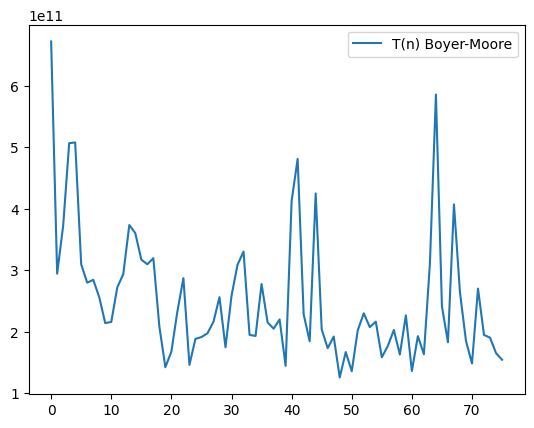

In [10]:
df.plot(y='T(n) Boyer-Moore')

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.

In [11]:
print(runtime)

[671930122240.0, 294456131584.0, 372379746304.0, 506566017024.0, 507766112256.0, 309540159488.0, 279830069248.0, 284474998784.0, 256246022144.0, 214033760256.0, 215957897216.0, 272080044032.0, 293702991872.0, 373533179904.0, 360225177600.0, 317193977856.0, 309724971008.0, 319604129792.0, 208481026048.0, 142331871232.0, 167830093824.0, 233138028544.0, 287109021696.0, 146163892224.0, 188368814080.0, 191382159360.0, 197451055104.0, 216158961664.0, 256238944256.0, 174708228096.0, 258314076160.0, 308848099328.0, 330322149376.0, 194943647744.0, 193135640576.0, 277611020288.0, 215301226496.0, 205020725248.0, 220011954176.0, 144555114496.0, 412732358656.0, 480982073344.0, 228348133376.0, 184563007488.0, 424929918976.0, 203857330176.0, 173279019008.0, 192201097216.0, 125649289216.0, 166950076416.0, 135825981440.0, 202424713216.0, 229970018304.0, 207533899776.0, 216395939840.0, 158453727232.0, 176864100352.0, 202818977792.0, 162920136704.0, 226603040768.0, 136152875008.0, 192886079488.0, 1633741

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

,T(n) Boyer-Moore
0,6.719301e+11
1,2.944561e+11
2,3.723797e+11
3,5.065660e+11
4,5.077661e+11
...,...
71,2.701580e+11
72,1.947269e+11
73,1.903970e+11
74,1.651940e+11


<AxesSubplot: >

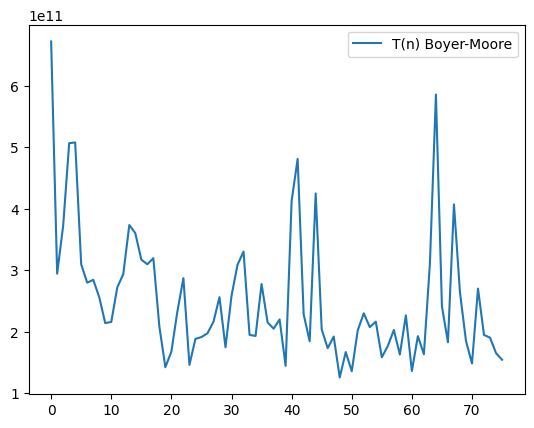

In [13]:
df.plot(y='T(n) Boyer-Moore')

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

,T(n) Boyer-Moore
0,6.719301e+11
1,2.944561e+11
2,3.723797e+11
3,5.065660e+11
4,5.077661e+11
...,...
71,2.701580e+11
72,1.947269e+11
73,1.903970e+11
74,1.651940e+11


<AxesSubplot: >

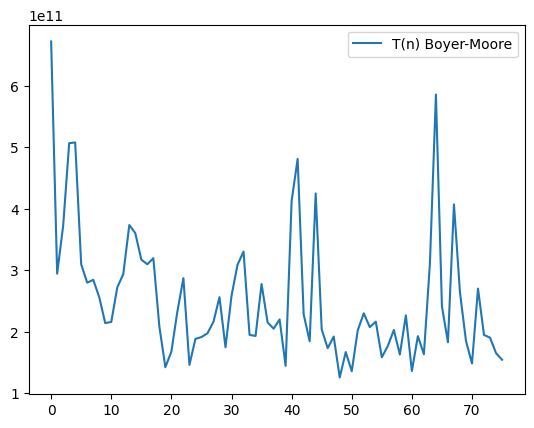

In [15]:
df.plot(y='T(n) Boyer-Moore')

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Boyer-Moore']
df

,T(n) Boyer-Moore
0,6.719301e+11
1,2.944561e+11
2,3.723797e+11
3,5.065660e+11
4,5.077661e+11
...,...
71,2.701580e+11
72,1.947269e+11
73,1.903970e+11
74,1.651940e+11


<AxesSubplot: >

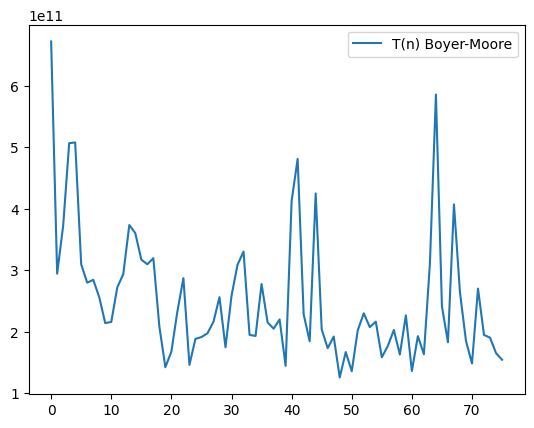

In [17]:
df.plot(y='T(n) Boyer-Moore')

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.